# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
import pandas as pd
import os
import pylab as pl
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
%pylab inline
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#downloading data from my github repo and put it in PUIDATA for reproducible purpose
!curl -O https://raw.githubusercontent.com/estellaleee/PUI2018_pl1840/master/HW9_pl1840/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv
!mv API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv $PUIDATA
!curl -O https://raw.githubusercontent.com/estellaleee/PUI2018_pl1840/master/HW9_pl1840/World_firearms_murders_and_ownership.csv
!mv World_firearms_murders_and_ownership.csv $PUIDATA
!curl -O https://raw.githubusercontent.com/estellaleee/PUI2018_pl1840/master/HW9_pl1840/data-pvLFI.csv
!mv data-pvLFI.csv $PUIDATA
!curl -O https://raw.githubusercontent.com/estellaleee/PUI2018_pl1840/master/HW9_pl1840/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv
!mv API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv $PUIDATA
!ls $PUIDATA

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  237k  100  237k    0     0  1366k      0 --:--:-- --:--:-- --:--:-- 1374k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7852  100  7852    0     0  54078      0 --:--:-- --:--:-- --:--:-- 53780
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   449  100   449    0     0   2964      0 --:--:-- --:--:-- --:--:--  2973
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  168k  100  168k    0     0  1193k      0 --:--:-- --:--:-- --:--:-- 1200k
201501-citibike-tripdata.csv
201502-citibike-tripdat

In [3]:
#reading data
df1 = pd.read_csv(os.getenv("PUIDATA") + "/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv",skiprows=4)
df2 = pd.read_csv(os.getenv("PUIDATA") + "/World_firearms_murders_and_ownership.csv")
df3 = pd.read_csv(os.getenv("PUIDATA") + "/data-pvLFI.csv")
df4 = pd.read_csv(os.getenv("PUIDATA") + "/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv",skiprows=4)

In [4]:
#merging data
df1 = df1[['Country Name','2012']]
df1.rename(columns={"2012":"gdp"}, inplace=True)

df2 = df2[['Country/Territory','Average total all civilian firearms','Number of homicides by firearm']]
df2.rename(columns={"Country/Territory":"Country Name"},inplace=True)

df4= df4[['Country Name','2012']]
df4.rename(columns={"2012":"pop"}, inplace=True)

df = df1.merge(df2, on='Country Name', how='inner')
dff = df.merge(df4, on='Country Name', how='inner')

In [5]:
df_ = dff.merge(df3, right_on="Country", left_on="Country Name", how="inner")
df_.rename(columns={"Number of mass shootings (1983-2013)":"Number of mass shootings"}, inplace=True)
df_

,Country Name,gdp,Average total all civilian firearms,Number of homicides by firearm,pop,Country,Guns per 100 inhabitants,Number of mass shootings
0,Australia,1.543411e+12,3050000.0,30.0,22742475.0,Australia,15.0,4
1,Austria,4.094252e+11,2500000.0,18.0,8429991.0,Austria,30.4,1
2,Belgium,4.978842e+11,1800000.0,70.0,11128246.0,Belgium,17.2,2
3,Canada,1.824289e+12,9950000.0,173.0,34750545.0,Canada,30.8,4
4,Switzerland,6.680436e+11,3400000.0,57.0,7996861.0,Switzerland,45.7,2
5,Germany,3.543984e+12,25000000.0,158.0,80425823.0,Germany,30.3,7
6,Denmark,3.271489e+11,650000.0,15.0,5591572.0,Denmark,12.0,0
7,Spain,1.336019e+12,4500000.0,90.0,46773055.0,Spain,10.4,1
8,Finland,2.567065e+11,2400000.0,24.0,5413971.0,Finland,45.3,2
9,France,2.683825e+12,19000000.0,35.0,65659789.0,France,31.2,6


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


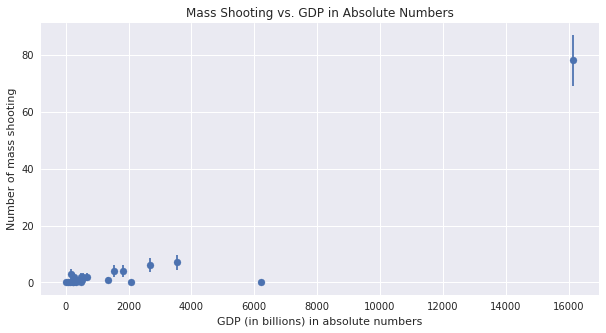

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings.
And it can be treat as outlier compares to other countries.


In [51]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions) in absolute numbers")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
ax.set_title("Mass Shooting vs. GDP in Absolute Numbers")

pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings.\n"+
      "And it can be treat as outlier compares to other countries.")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


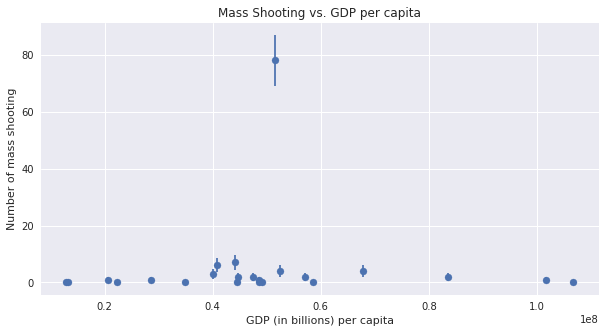

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top middle of the plot is the USA, which has the highest number of mass shootingsbut not the highest GDP per capita at this time.
And it can be treat as outlier compares to other countries.


In [7]:
df_['gdppercapita']=(df_['gdp']/df_['pop']) * 1000

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdppercapita'], df_['Number of mass shootings'])
ax.errorbar(df_['gdppercapita'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions) per capita")
ax.set_ylabel("Number of mass shooting")
ax.set_ylim()
ax.set_title("Mass Shooting vs. GDP per capita")

pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top middle of the plot is the USA, " + 
       "which has the highest number of mass shootings" +
      "but not the highest GDP per capita at this time.\n"+
      "And it can be treat as outlier compares to other countries.")



## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [8]:
#I have no idea where should I use this variable in this question
df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1000

I'm gonna plot average number of civilian fire arms per person vs. gdp in absolute number without & with error bar, respectively.

In [9]:
df_['civpp']=df_['Average total all civilian firearms']/df_['pop'] * 1000

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


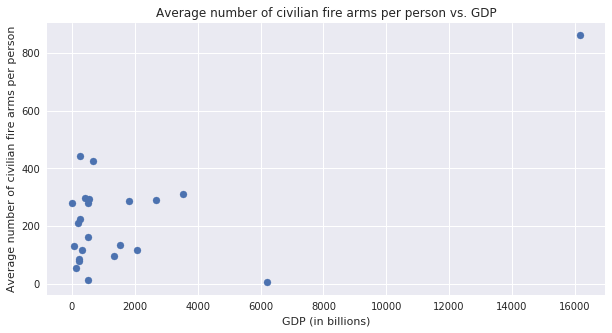

Average number of civilian fire arms per person vs. GDP, without error bar.
The datapoint to the top right of the plot is the USA, which has the highest number of average civilian fire arms per personand the highest GDP per capita at this time.
And it can be treat as outlier compares to other countries.


In [10]:
#without errors
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp']/1e9, df_['civpp'])
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
ax.set_title("Average number of civilian fire arms per person vs. GDP")

pl.show()
print ("Average number of civilian fire arms per person vs. GDP, "
       + 
       "without error bar.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest number of average civilian fire arms per person" +
      "and the highest GDP per capita at this time.\n"+
      "And it can be treat as outlier compares to other countries.")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


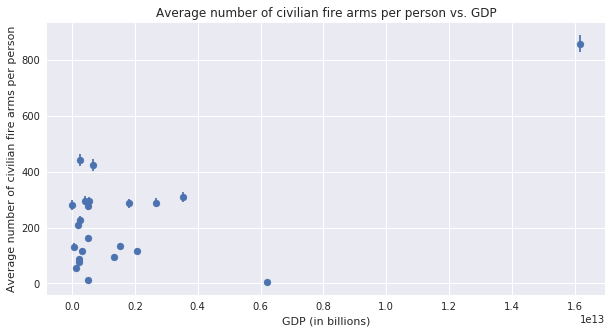

Average number of civilian fire arms per person vs. GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has the highest number of average civilian fire arms per personand the highest GDP per capita at this time.
And it can be treat as outlier compares to other countries.


In [11]:
#with error
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp'], df_['civpp'])
ax.errorbar(df_['gdp'], df_['civpp'], 
            yerr = np.sqrt(df_['civpp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of civilian fire arms per person")
ax.set_ylim()
ax.set_title("Average number of civilian fire arms per person vs. GDP")


pl.show()
print ("Average number of civilian fire arms per person vs. GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has the highest number of average civilian fire arms per person" +
      "and the highest GDP per capita at this time.\n"+
      "And it can be treat as outlier compares to other countries.")

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


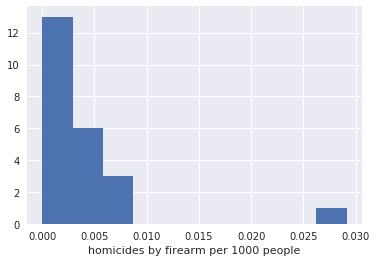

In [12]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


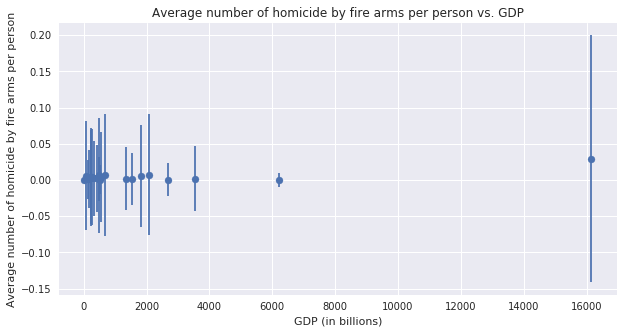

Average number of homicide by fire arms per person vs. GDP, errors represent Poisson statistics.
The datapoint to the right corner of the plot is the USA, which has the highest number of average homicide by fire arms per personand the highest GDP per capita at this time.
This point can be treat as outlier compares to other countries in this plot.


In [13]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['gdp']/1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000)
ax.errorbar(df_['gdp']/1e9, df_['Number of homicides by firearm'] / df_['pop'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['pop'] * 1000 * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Average number of homicide by fire arms per person")
ax.set_ylim()
ax.set_title("Average number of homicide by fire arms per person vs. GDP")


pl.show()
print ("Average number of homicide by fire arms per person vs. GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the right corner of the plot is the USA, " + 
       "which has the highest number of average homicide by fire arms per person" +
      "and the highest GDP per capita at this time.\n" +
      "This point can be treat as outlier compares to other countries in this plot.")

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


In [14]:
us = df_[(df_['Country Name'] == 'United States')]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


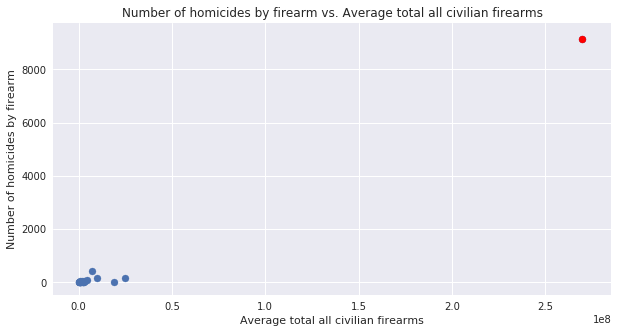

Number of homicides by firearm vs. Average total all civilian firearms, without errors.
The red datapoint to the top right of the plot is the USA, which has the largest number of homicides by firearm and the largest number of cibilian firearms.
And it can be treat as outlier compares to other countries.


In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
scatter = ax.scatter(us['Average total all civilian firearms'], us['Number of homicides by firearm'], c='r')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
ax.set_title("Number of homicides by firearm vs. Average total all civilian firearms")

pl.show()
print ("Number of homicides by firearm vs. Average total all civilian firearms, " + 
       "without errors.\n" + 
       "The red datapoint to the top right of the plot is the USA, " + 
       "which has the largest number of homicides by firearm and the largest number of cibilian firearms.\n"+
      "And it can be treat as outlier compares to other countries.")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


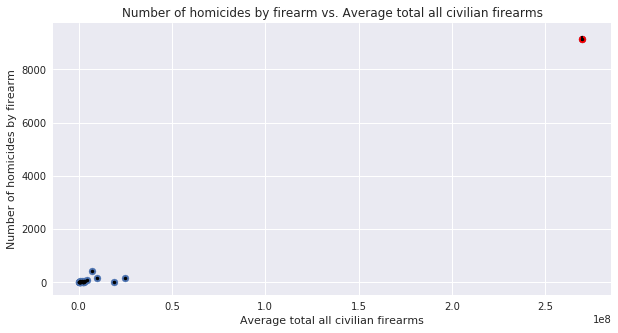

Number of homicides by firearm vs. Average total all civilian firearms, , errors represent Poisson statistics.
The red datapoint to the top right of the plot is the USA, which has the largest number of homicides by firearm and the largest number of cibilian firearms.
And it can be treat as outlier compares to other countries.


In [16]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'])
scatter = ax.scatter(us['Average total all civilian firearms'], us['Number of homicides by firearm'], c='r')
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of homicides by firearm'], 
            yerr = np.sqrt(df_['Number of homicides by firearm'] * 1.0), fmt = '.', c='black')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearm")
ax.set_ylim()
ax.set_title("Number of homicides by firearm vs. Average total all civilian firearms")


pl.show()
print ("Number of homicides by firearm vs. Average total all civilian firearms, , " + 
       "errors represent Poisson statistics.\n" + 
      "The red datapoint to the top right of the plot is the USA, " + 
       "which has the largest number of homicides by firearm and the largest number of cibilian firearms.\n"+
      "And it can be treat as outlier compares to other countries.")

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


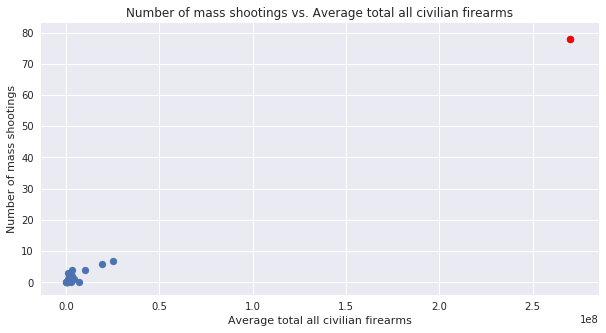

Number of mass shootings vs. Average total all civilian firearms, without errors.
The red datapoint to the top right of the plot is the USA, which has the largest number of mass shootings and the largest number of cibilian firearms.
And it can be treat as outlier compares to other countries.


In [17]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'])
scatter = ax.scatter(us['Average total all civilian firearms'], us['Number of mass shootings'], c='r')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
ax.set_title("Number of mass shootings vs. Average total all civilian firearms")

pl.show()
print ("Number of mass shootings vs. Average total all civilian firearms, " + 
       "without errors.\n" + 
       "The red datapoint to the top right of the plot is the USA, " + 
       "which has the largest number of mass shootings and the largest number of cibilian firearms.\n"+
      "And it can be treat as outlier compares to other countries.")

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


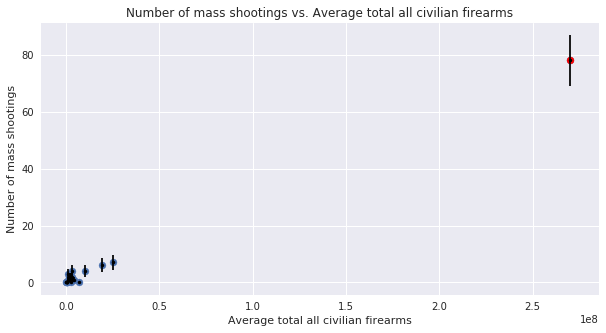

Number of mass shootings vs. Average total all civilian firearms, , errors represent Poisson statistics.
The red datapoint to the top right of the plot is the USA, which has the largest number of mass shooting and the largest number of cibilian firearms.
And it can be treat as outlier compares to other countries.


In [36]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Average total all civilian firearms'], df_['Number of mass shootings'])
scatter = ax.scatter(us['Average total all civilian firearms'], us['Number of mass shootings'], c='r')
ax.errorbar(df_['Average total all civilian firearms'], df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.', c='black')
ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
ax.set_title("Number of mass shootings vs. Average total all civilian firearms")


pl.show()
print ("Number of mass shootings vs. Average total all civilian firearms, , " + 
       "errors represent Poisson statistics.\n" + 
      "The red datapoint to the top right of the plot is the USA, " + 
       "which has the largest number of mass shooting and the largest number of cibilian firearms.\n"+
      "And it can be treat as outlier compares to other countries.")

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [19]:
#setting both quantities on the same order of magnitude
df_['shootingspp_rescale'] = df_['shootingspp']*10000
df_['civpp_rescale'] = df_['civpp'] / 1000

In [21]:
#OLS model with intercept
olsmod = sm.OLS(endog=df_['shootingspp_rescale'], exog= sm.add_constant(df_['civpp_rescale']), missing='drop').fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     shootingspp_rescale   R-squared:                       0.192
Model:                             OLS   Adj. R-squared:                  0.153
Method:                  Least Squares   F-statistic:                     4.981
Date:                 Tue, 13 Nov 2018   Prob (F-statistic):             0.0367
Time:                         17:40:46   Log-Likelihood:                -40.676
No. Observations:                   23   AIC:                             85.35
Df Residuals:                       21   BIC:                             87.62
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.3684      0.497      0.742      0.467        -0.665     1.402
civpp_rescale     3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Number of mass shootings per person vs. Average total all civilian firearms per person')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


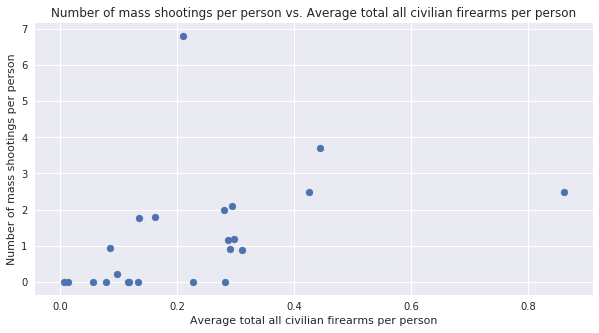

In [23]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['civpp_rescale'], df_['shootingspp_rescale'])
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
ax.set_title("Number of mass shootings per person vs. Average total all civilian firearms per person")

**Figure : Scatter plot for mass shootings per person against average total civilian firearms per person**

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


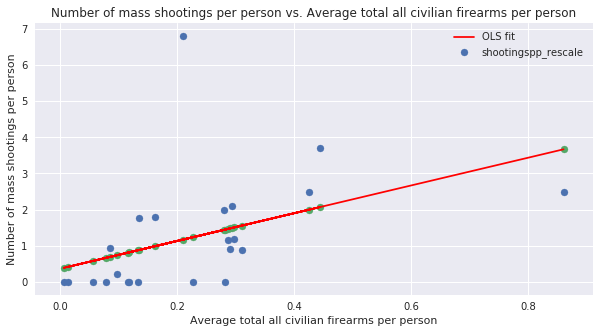

In [42]:
#OLS
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['civpp_rescale'], df_['shootingspp_rescale'])
scatter = ax.scatter(df_['civpp_rescale'], olsmod.fittedvalues)
fittedline = ax.plot(df_['civpp_rescale'], olsmod.fittedvalues, '-', c='r', label='OLS fit')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
ax.set_title("Number of mass shootings per person vs. Average total all civilian firearms per person")
ax.legend()


**Figure : Scatter plot for mass shootings per person against average total civilian firearms per person with OLS linear regression model**

In [22]:
#WLS model with intercept
yerr = np.where(np.abs(np.sqrt(df_['shootingspp_rescale']))==0, 0.5, np.abs(np.sqrt(df_['shootingspp_rescale'])))
wlsmod = sm.WLS(endog=df_['shootingspp_rescale'], exog= sm.add_constant(df_['civpp']), 
                weights = 1/yerr).fit()
wlsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             WLS Regression Results                            
===============================================================================
Dep. Variable:     shootingspp_rescale   R-squared:                       0.293
Model:                             WLS   Adj. R-squared:                  0.259
Method:                  Least Squares   F-statistic:                     8.694
Date:                 Tue, 13 Nov 2018   Prob (F-statistic):            0.00767
Time:                         17:41:05   Log-Likelihood:                -32.527
No. Observations:                   23   AIC:                             69.05
Df Residuals:                       21   BIC:                             71.33
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0795      0.312     -0.255      0.801        -0.728     0.569
civpp          0.0040      0.001      2.949      0.008         0.001     0.007
==============================================================================
Omnibus:                       16.348   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.941
Skew:                           1.475   Prob(JB):                     7.71e-05
Kurtosis:                       6.325   Cond. No.                         353.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


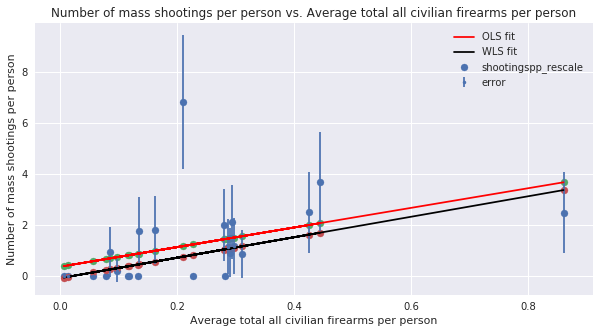

In [41]:
#OLS&WLS
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['civpp_rescale'], df_['shootingspp_rescale'])
scatter = ax.scatter(df_['civpp_rescale'], olsmod.fittedvalues)
scatter = ax.scatter(df_['civpp_rescale'], wlsmod.fittedvalues)
fittedline = ax.plot(df_['civpp_rescale'], olsmod.fittedvalues, '-', c='r', label='OLS fit')
fittedline = ax.plot(df_['civpp_rescale'], wlsmod.fittedvalues, '-', c='black', label='WLS fit')
ax.errorbar(df_['civpp_rescale'], df_['shootingspp_rescale'],yerr=np.sqrt(df_['shootingspp_rescale']*1.0),fmt='.', label='error')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
ax.set_title("Number of mass shootings per person vs. Average total all civilian firearms per person")
pl.legend()

**Figure :Scatter plot for mass shootings per person against average total civilian firearms per person, with OLS linear regression model, WLS linear regression model and statistical error**

Text(0.5,1,'Number of mass shootings per person vs. Average total all civilian firearms per person')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


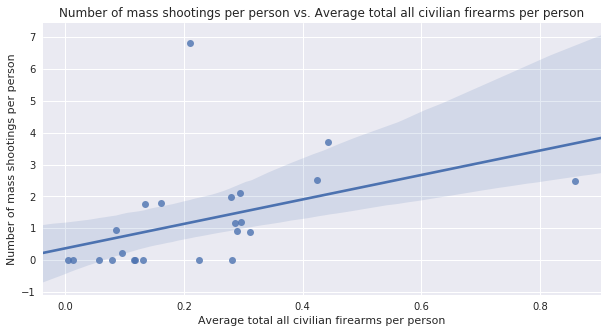

In [37]:
#seaborn
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
ax = sns.regplot(df_['civpp_rescale'], df_['shootingspp_rescale'], data=df_)
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
ax.set_title("Number of mass shootings per person vs. Average total all civilian firearms per person")

**Figure : Scatter plot for mass shootings per person against average total civilian firearms per person, with regression confidence interval**

numpy polyfit parameters [ 3.83730258  0.36839729]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


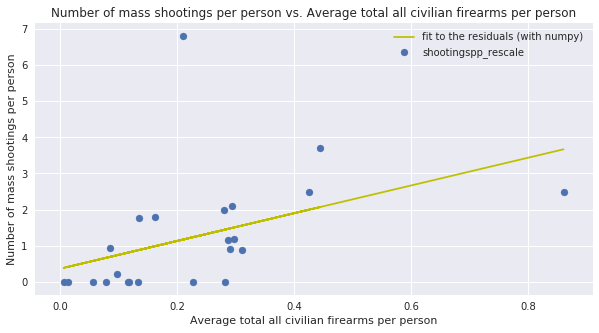

In [47]:
#numpy.polyfit() first order polynomial
mrres = np.polyfit(df_['civpp_rescale'], df_['shootingspp_rescale'],1)
print ('numpy polyfit parameters', mrres)
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(df_['civpp_rescale'], df_['shootingspp_rescale'])
nppoly = ax.plot(df_['civpp_rescale'], mrres[0] * df_['civpp_rescale'] + mrres[1], 'y',
       label = 'fit to the residuals (with numpy)')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
ax.set_title("Number of mass shootings per person vs. Average total all civilian firearms per person")
ax.legend()


**Figure : Scatter plot for mass shootings per person against average total civilian firearms per person, with first order polynomial regression model fitted by numpy**

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



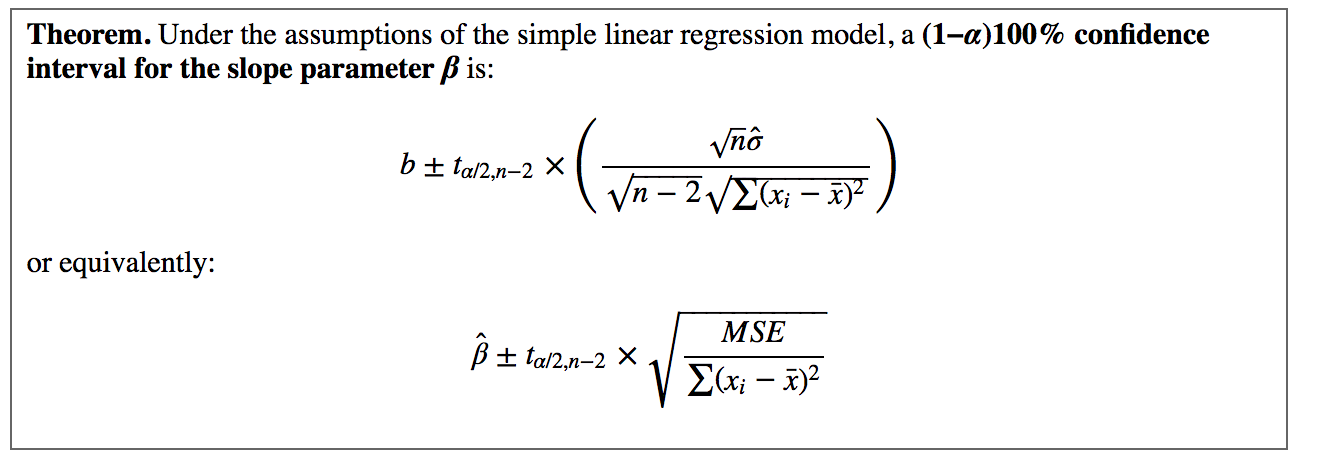

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

In [60]:
#recall ols model summary
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     shootingspp_rescale   R-squared:                       0.192
Model:                             OLS   Adj. R-squared:                  0.153
Method:                  Least Squares   F-statistic:                     4.981
Date:                 Tue, 13 Nov 2018   Prob (F-statistic):             0.0367
Time:                         22:57:38   Log-Likelihood:                -40.676
No. Observations:                   23   AIC:                             85.35
Df Residuals:                       21   BIC:                             87.62
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.3684      0.497      0.742      0.467        -0.665     1.402
civpp_rescale     3.8373      1.719      2.232      0.037         0.262     7.413
==============================================================================
Omnibus:                       34.558   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.760
Skew:                           2.666   Prob(JB):                     5.32e-20
Kurtosis:                      11.012   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
x = df_['civpp_rescale']
y = df_['shootingspp_rescale']

In [54]:
t = scipy.stats.t.ppf(0.975, 21)
t

2.0796138447276622

In [59]:
sigma = np.sqrt(sum((y - olsmod.fittedvalues)**2)/23)
sigma                

1.4184682028114883

In [62]:
#slope
b1 = 3.8373 - t * (np.sqrt(23)*sigma/(np.sqrt(21)*np.sqrt(sum((x-np.mean(x))**2))))
b2 = 3.8373 + t * (np.sqrt(23)*sigma/(np.sqrt(21)*np.sqrt(sum((x-np.mean(x))**2))))

#intercept
a1 = 0.3684 - t * np.sqrt(sigma**2/21)
a2 = 0.3684 + t * np.sqrt(sigma**2/21)

#model
y1 = b1 * x + a1
y2 = b2 * x + a2

Text(0.5,1,'Number of mass shootings per person vs. Average total all civilian firearms per person')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


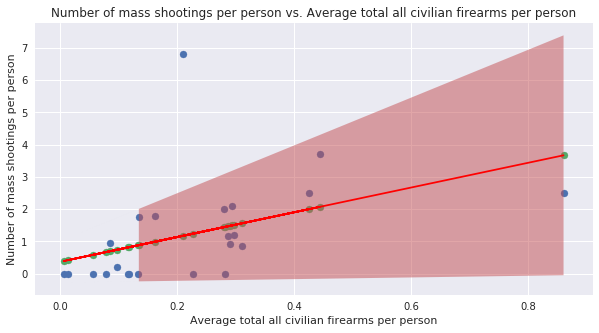

In [64]:
#Confidence intervals for the parameters slope and intercept
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['civpp_rescale'], df_['shootingspp_rescale'])
scatter = ax.scatter(df_['civpp_rescale'], olsmod.fittedvalues)
fittedline = ax.plot(df_['civpp_rescale'], olsmod.fittedvalues, '-', c='r', label='OLS fit')
ci = ax.fill_between(x,y1,y2,alpha=0.5)
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
ax.set_ylim()
ax.set_title("Number of mass shootings per person vs. Average total all civilian firearms per person")

**Figure :Scatter plot for mass shootings per person against average total civilian firearms per person, with confidence intervals for the parameters slope and intercept**

## Compare: Seaborn seems more precise compare to pylab.fill_between()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


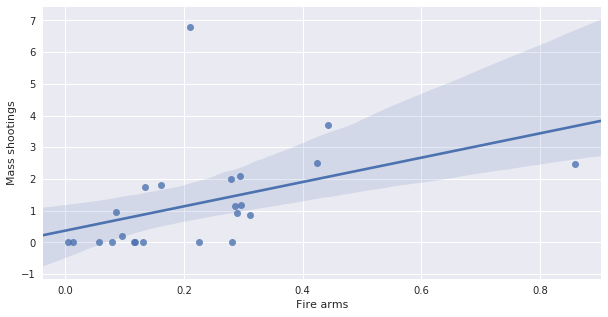

In [67]:
pl.figure(figsize=(10,5))
sns.regplot(x=x, y=y, data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

**Figure :Scatter plot for mass shootings per person against average total civilian firearms per person, with confidence intervals plotting by seaborn**

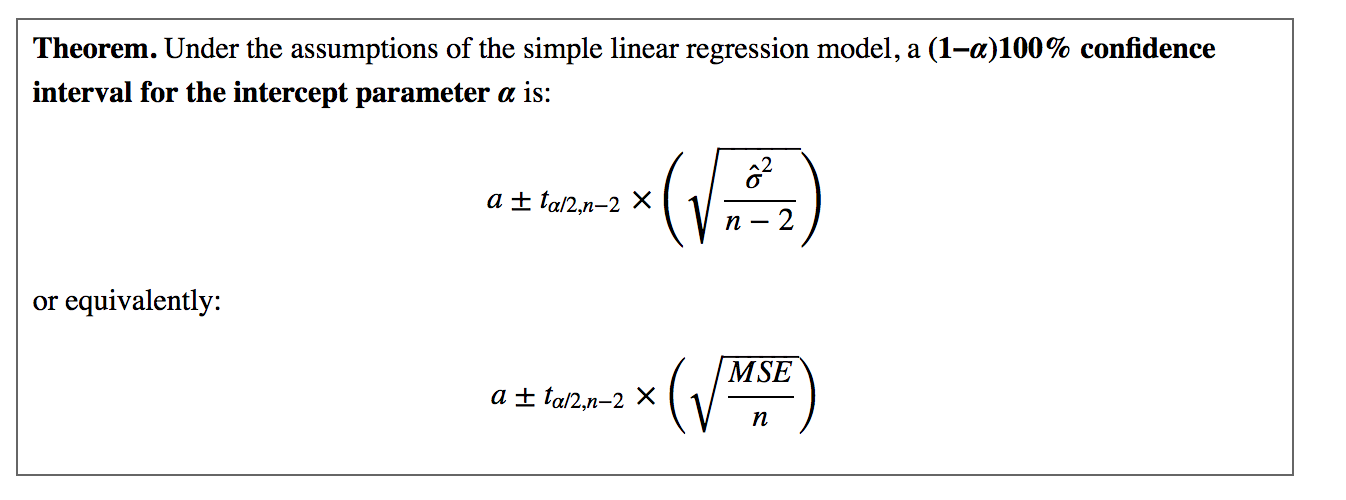

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

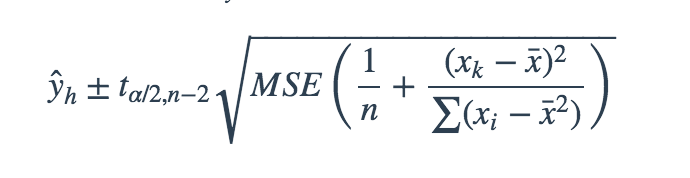

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

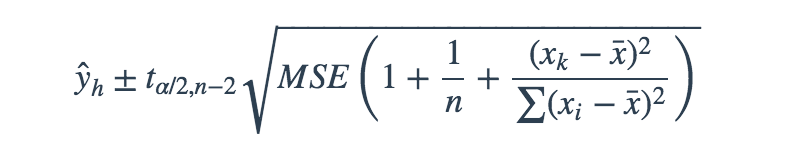

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


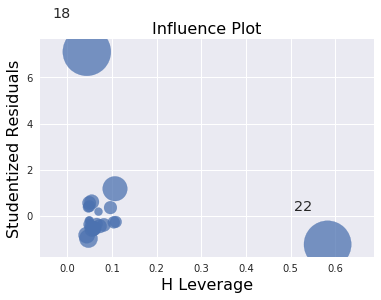

In [72]:
pl.figure(figsize=(10,5))
sm.graphics.influence_plot(olsmod, alpha  = 0.05, criterion="cooks");

In [71]:
df_.loc[[18, 22], :]

,Country Name,gdp,Average total all civilian firearms,Number of homicides by firearm,pop,Country,Guns per 100 inhabitants,Number of mass shootings,gdppercapita,shootingspp,civpp,shootingspp_rescale,civpp_rescale
18,New Zealand,1.761929e+11,925000.0,7.0,4408100.0,New Zealand,22.6,3,3.997026e+07,0.000681,209.840975,6.805653,0.209841
22,United States,1.615526e+13,270000000.0,9146.0,313993272.0,United States,88.8,78,5.145096e+07,0.000248,859.891036,2.484130,0.859891


**Answer:** 
- This plot shows the residual on y-axis and leverage on x-axis, so that this plot can be seen as a case to show how the parameter estimates would change if that case were excluded. The point size is the square root of Cook's D statistics, which is a measurement of the influence of the point.
- The most influence point would be the points with a large residual and high leverage. In this case, two influence points shown in the plot are New Zealand (index 18) and United States (index 22). The former has the highest residuals which will lower the significance of the fit of a statistical model. The latter has the highest leverage which will have large impact on the fitted model -- the fitted regression model will pass close to that particular observation.


## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings